<a href="https://colab.research.google.com/github/santhoshgitss/leaf-detection/blob/main/heart_disease_eda_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1| Import Libraries

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

# Step 2 | Read Dataset

In [ ]:
heart_df= pd.read_csv('heart.csv')

In [ ]:
heart_df = pd.DataFrame(heart_df)

In [ ]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


 # Step 3 | Dataset Overview & Preparation



 ### Step 3.1 | Description Of Variables

age: Age of the patient in years

sex: Gender of the patient (0: female, 1: male)

cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

trtbps: Resting blood pressure in mmHg

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)

restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

thalachh: Maximum heart rate achieved during a stress test
exng: Exercise induced angina (0: no, 1: yes)

oldpeak: ST depression induced by exercise relative to rest (unit -> depression)

slp: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)

caa: Number of major vessels (0-4) colored by fluoroscopy
thall: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

output: Heart disease status (0: no disease, 1: presence of disease

### Step 3.2 | Rename Variables

In [ ]:
# Renamed name of variables to have a better understanding while working on dataset:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [ ]:
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [ ]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    heart_df[feature] = heart_df[feature].map(lambda x: map_values(x, mapping))
    heart_df[feature] = heart_df[feature].astype(object)

In [ ]:
#First five Row
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [ ]:
# Last Five Row
heart_df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease
302,57,Female,Atypical angina,130,236,False,Normal,174,No,0.0,Flat,1,Reversible defect,No Disease


In [ ]:
heart_df.shape

(303, 14)

 ### Step 3.4 | Basic Information

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 303 entries, 0 to 302

Data columns (total 14 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   Age                   303 non-null    int64  

 1   Sex                   303 non-null    object 

 2   ChestPain             303 non-null    object 

 3   RestingBloodPressure  303 non-null    int64  

 4   Cholesterol           303 non-null    int64  

 5   FastingBloodSugar     303 non-null    object 

 6   RestingECG            303 non-null    object 

 7   MaxHeartRate          303 non-null    int64  

 8   ExcerciseAngina       303 non-null    object 

 9   OldPeak               303 non-null    float64

 10  STSlope               303 non-null    object 

 11  nMajorVessels         303 non-null    int64  

 12  Thalium               303 non-null    object 

 13  Status                303 non-null    object 

dtypes: float64(1), int64(5), object(8)

memory usage: 33.3+

### Step 3.5 | Statistical Summary

In [ ]:
stats_heart_df = heart_df.copy()

In [ ]:
# Statistical summary of numerical data
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
nMajorVessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


In [ ]:
# Statistical summary of categorical data
stats_heart_df.describe(include="object").T

,count,unique,top,freq
Sex,303,2,Male,207
ChestPain,303,4,Typical angina,143
FastingBloodSugar,303,2,False,258
RestingECG,303,3,Abnormality,152
ExcerciseAngina,303,2,No,204
STSlope,303,3,Downsloping,142
Thalium,303,4,Reversible defect,166
Status,303,2,Heart Disease,165


# Step 4 | Exploratary Data Analysis (EDA)



In [ ]:
heart_df_eda = heart_df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0]
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()


In [ ]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound

In [ ]:
outliers = {}

### Step 4.1 | Univariate Analysis

In [ ]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [ ]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA']

    category_counts = heart_df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = heart_df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

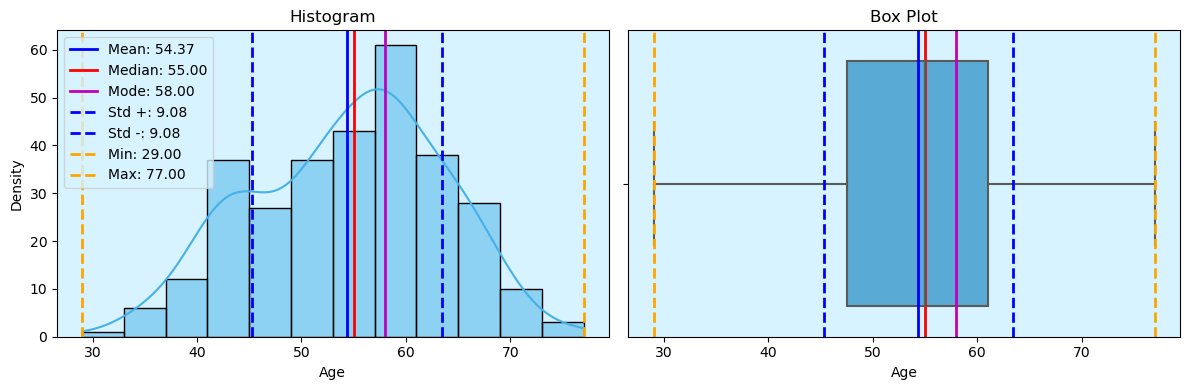

In [ ]:
# Age
box_hist_plot("Age")

In [ ]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.202

The distribution is left-skewed.


In [ ]:
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(heart_df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 27.25

Upper Bound: 81.25

Outliers: 0


In [ ]:
outliers.update({"Age":len(age_outliers)})
#There are no outliers in Age variable.

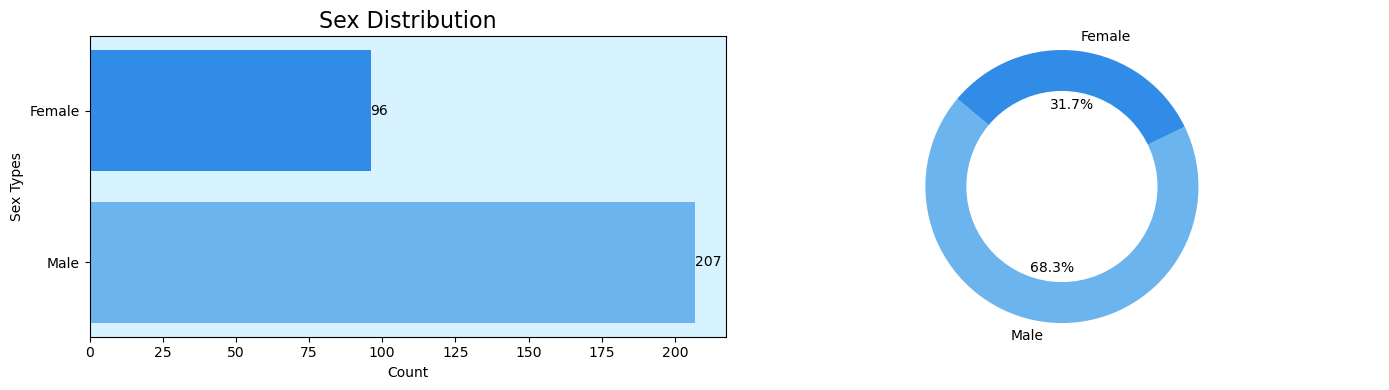

In [ ]:
# Sex
bar_donut_chart("Sex")

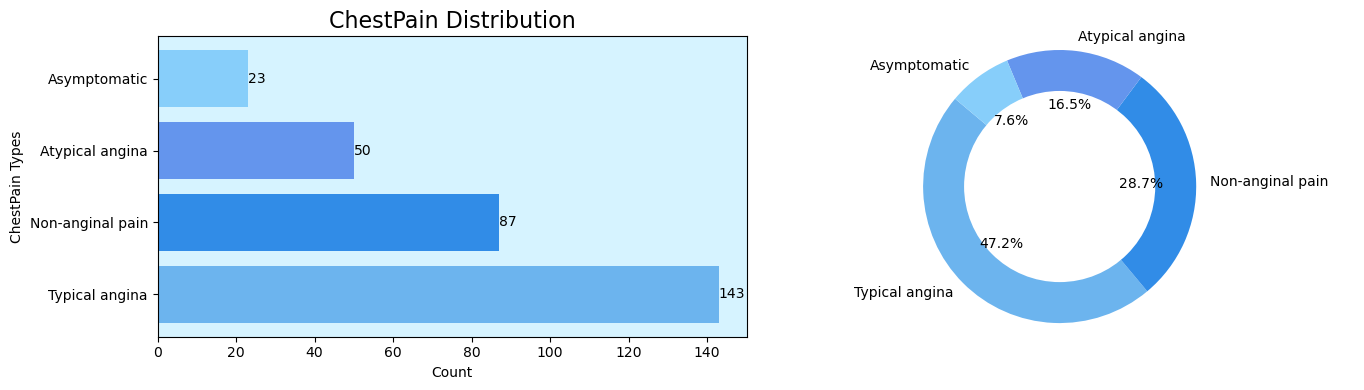

In [ ]:
#Chest Pain
bar_donut_chart("ChestPain")

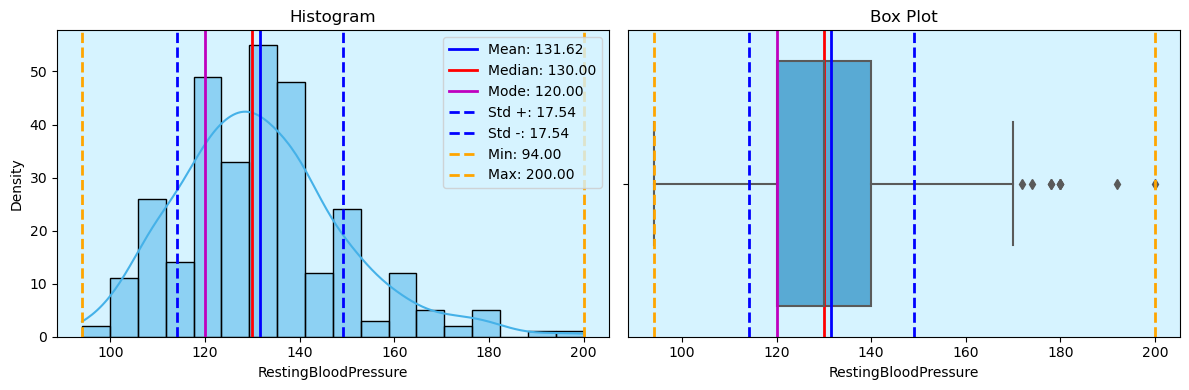

In [ ]:
#Resting Blood Pressure
box_hist_plot("RestingBloodPressure")

In [ ]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714

The distribution is right-skewed.


In [ ]:
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0

Upper Bound: 170.0

Outliers: 9


In [ ]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

In [ ]:
outliers

{'Age': 0, 'RestingBloodPressure': 9}

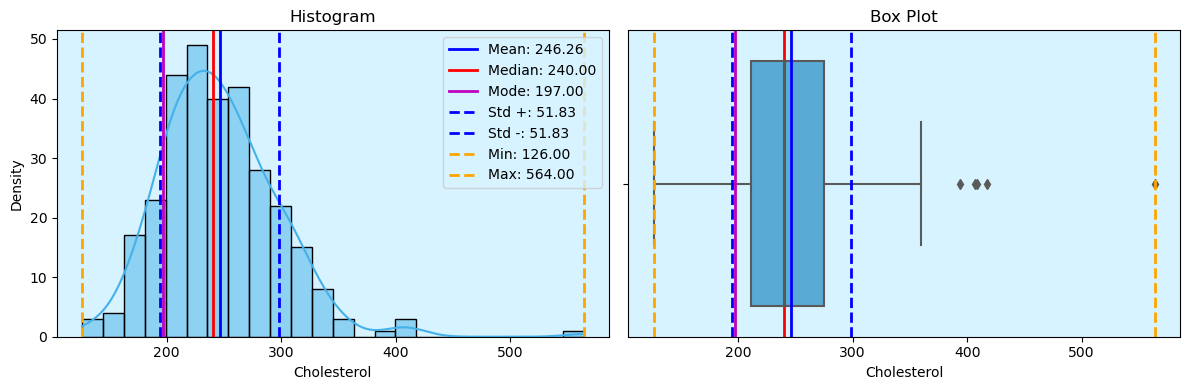

In [ ]:
# Cholesterol
box_hist_plot("Cholesterol")

In [ ]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143

The distribution is right-skewed.


In [ ]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(heart_df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.75

Upper Bound: 369.75

Outliers: 5


In [ ]:
outliers.update({"Cholesterol":len(ch_outliers)})

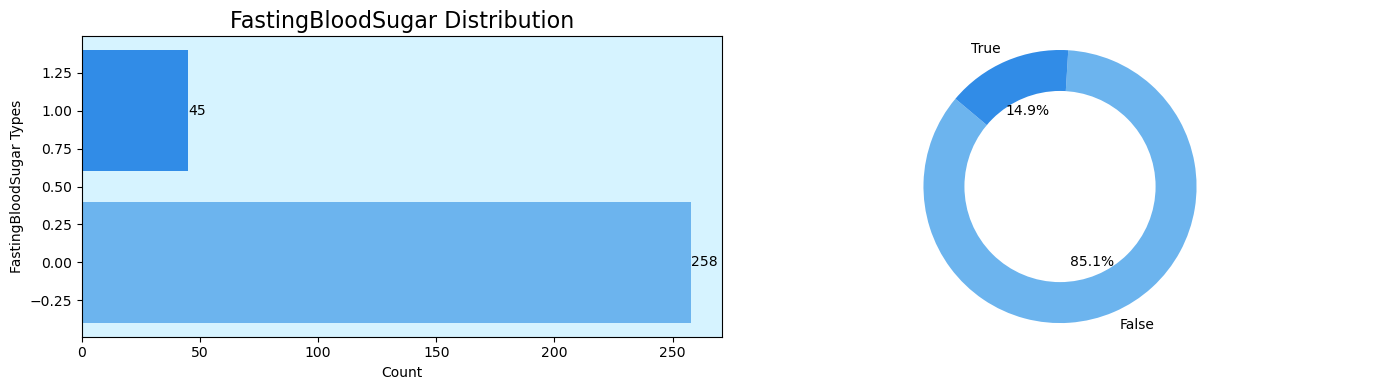

In [ ]:
# Fasting Blood Sugar
bar_donut_chart("FastingBloodSugar")

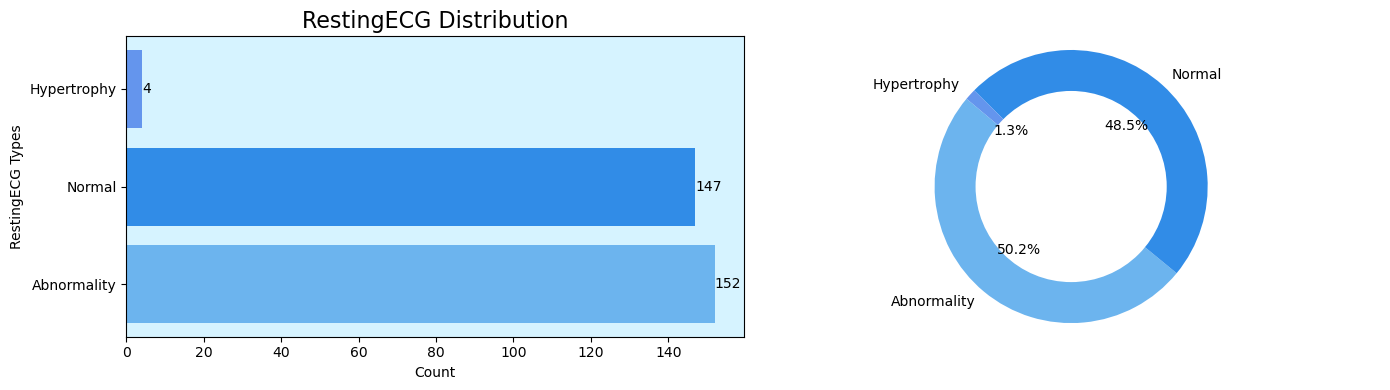

In [ ]:
#Resting ECG
bar_donut_chart("RestingECG")

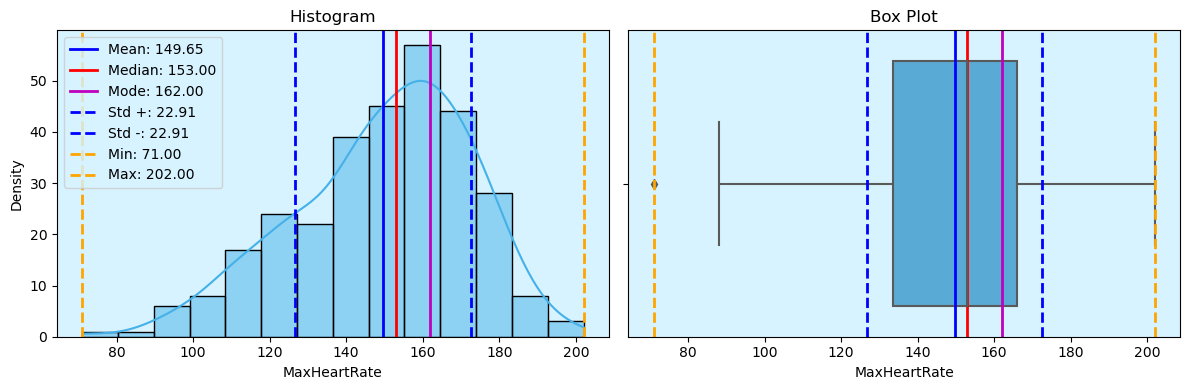

In [ ]:
#Max Heart Rate
box_hist_plot("MaxHeartRate")

In [ ]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537

The distribution is left-skewed.


In [ ]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(heart_df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 84.75

Upper Bound: 214.75

Outliers': 1


In [ ]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})

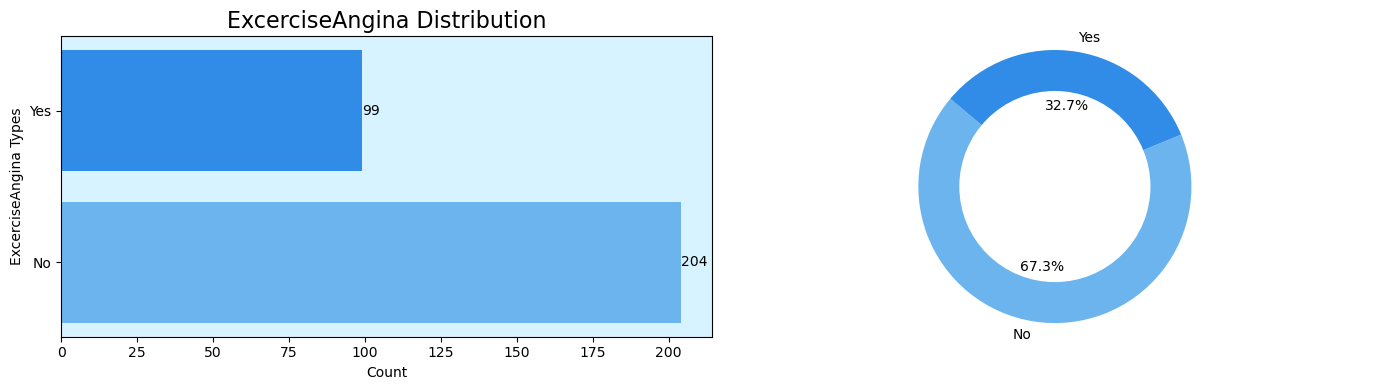

In [ ]:
#Excercise Angina
bar_donut_chart("ExcerciseAngina")

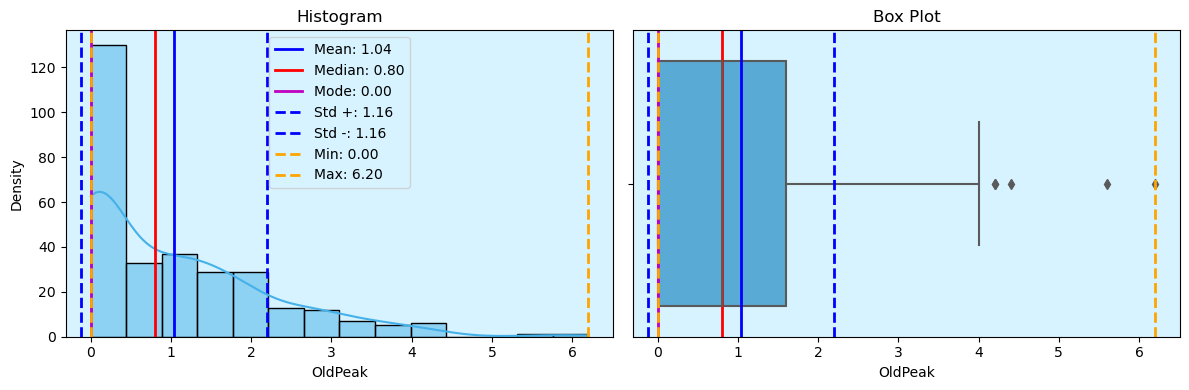

In [ ]:
#Old Peak
box_hist_plot("OldPeak")

In [ ]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(heart_df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.4000000000000004

Upper Bound: 4.0

Outliers': 5


In [ ]:
outliers.update({"OldPeak":len(op_outliers)})

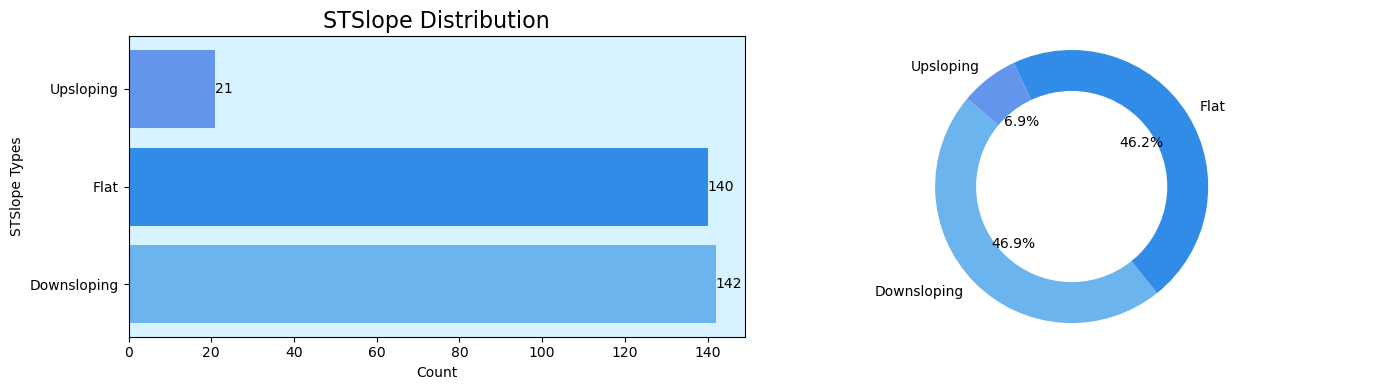

In [ ]:
 #STSlope
bar_donut_chart("STSlope")

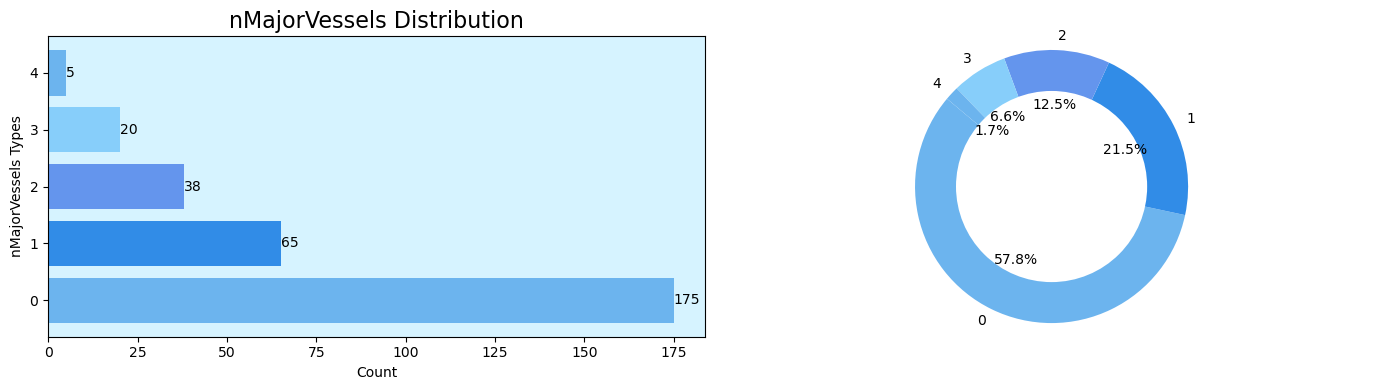

In [ ]:
#n Major Vessels
bar_donut_chart("nMajorVessels")

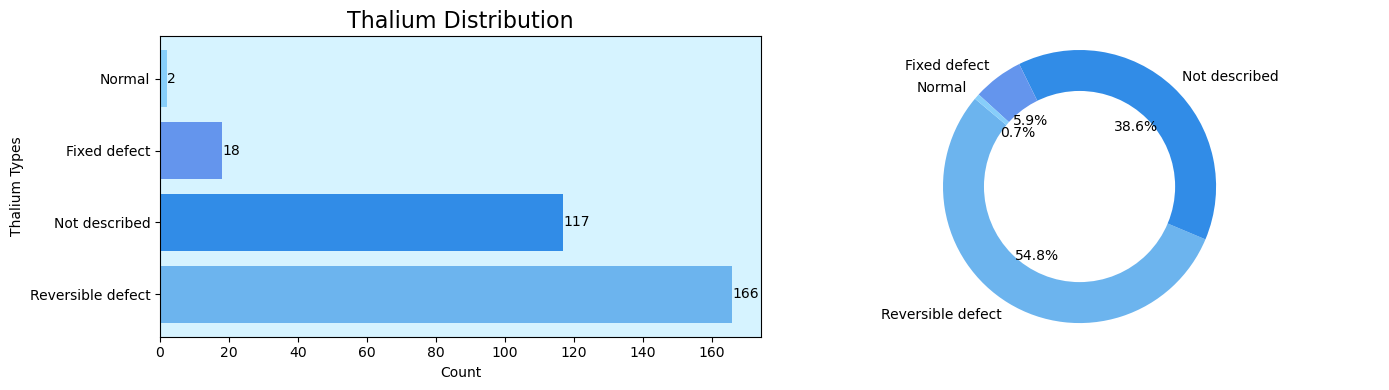

In [ ]:
#Thalium
bar_donut_chart("Thalium")

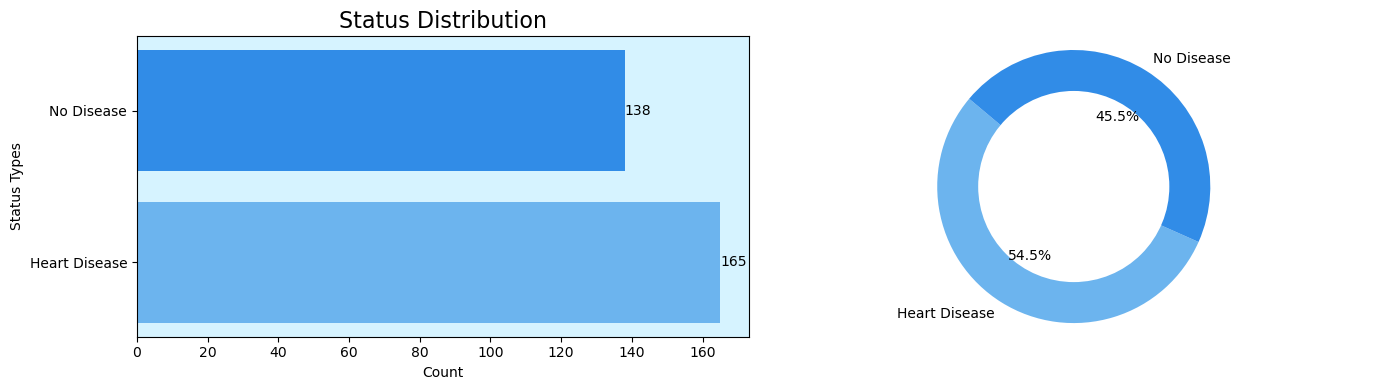

In [ ]:
#Status
bar_donut_chart("Status")

### Step 4.2 | Bivariate Analysis

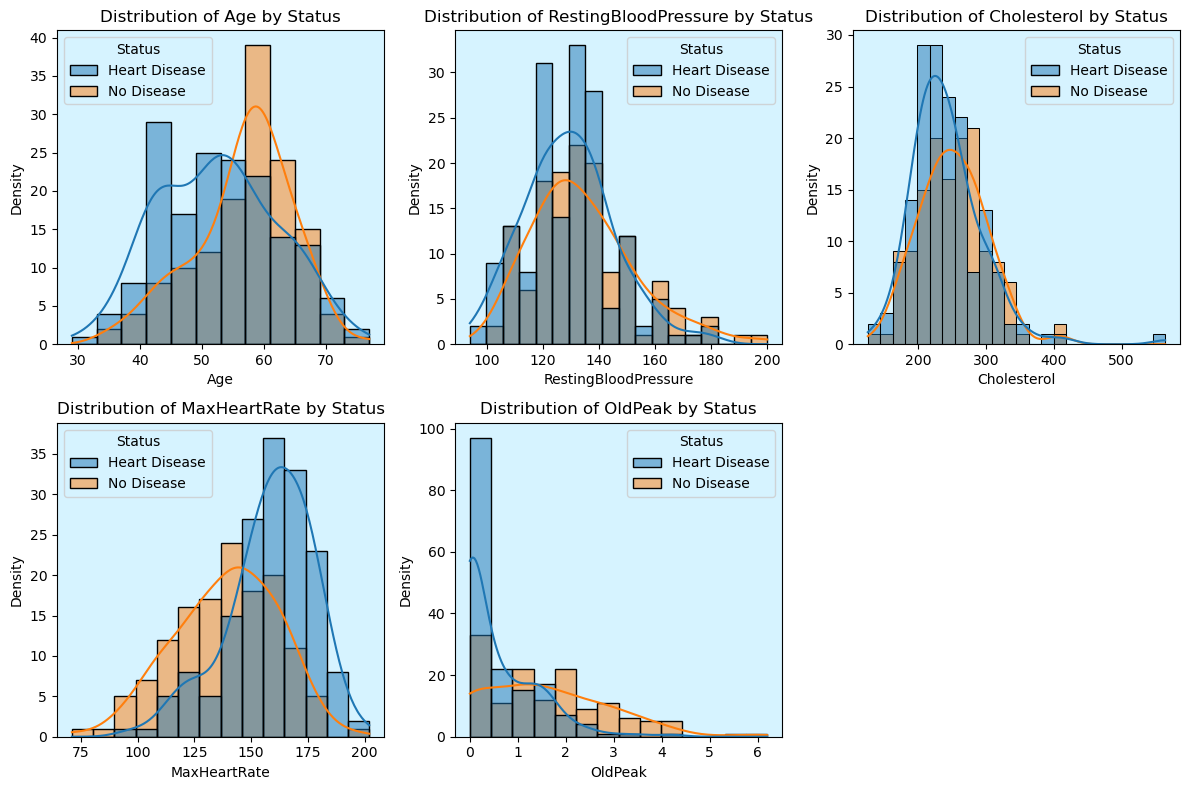

In [ ]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

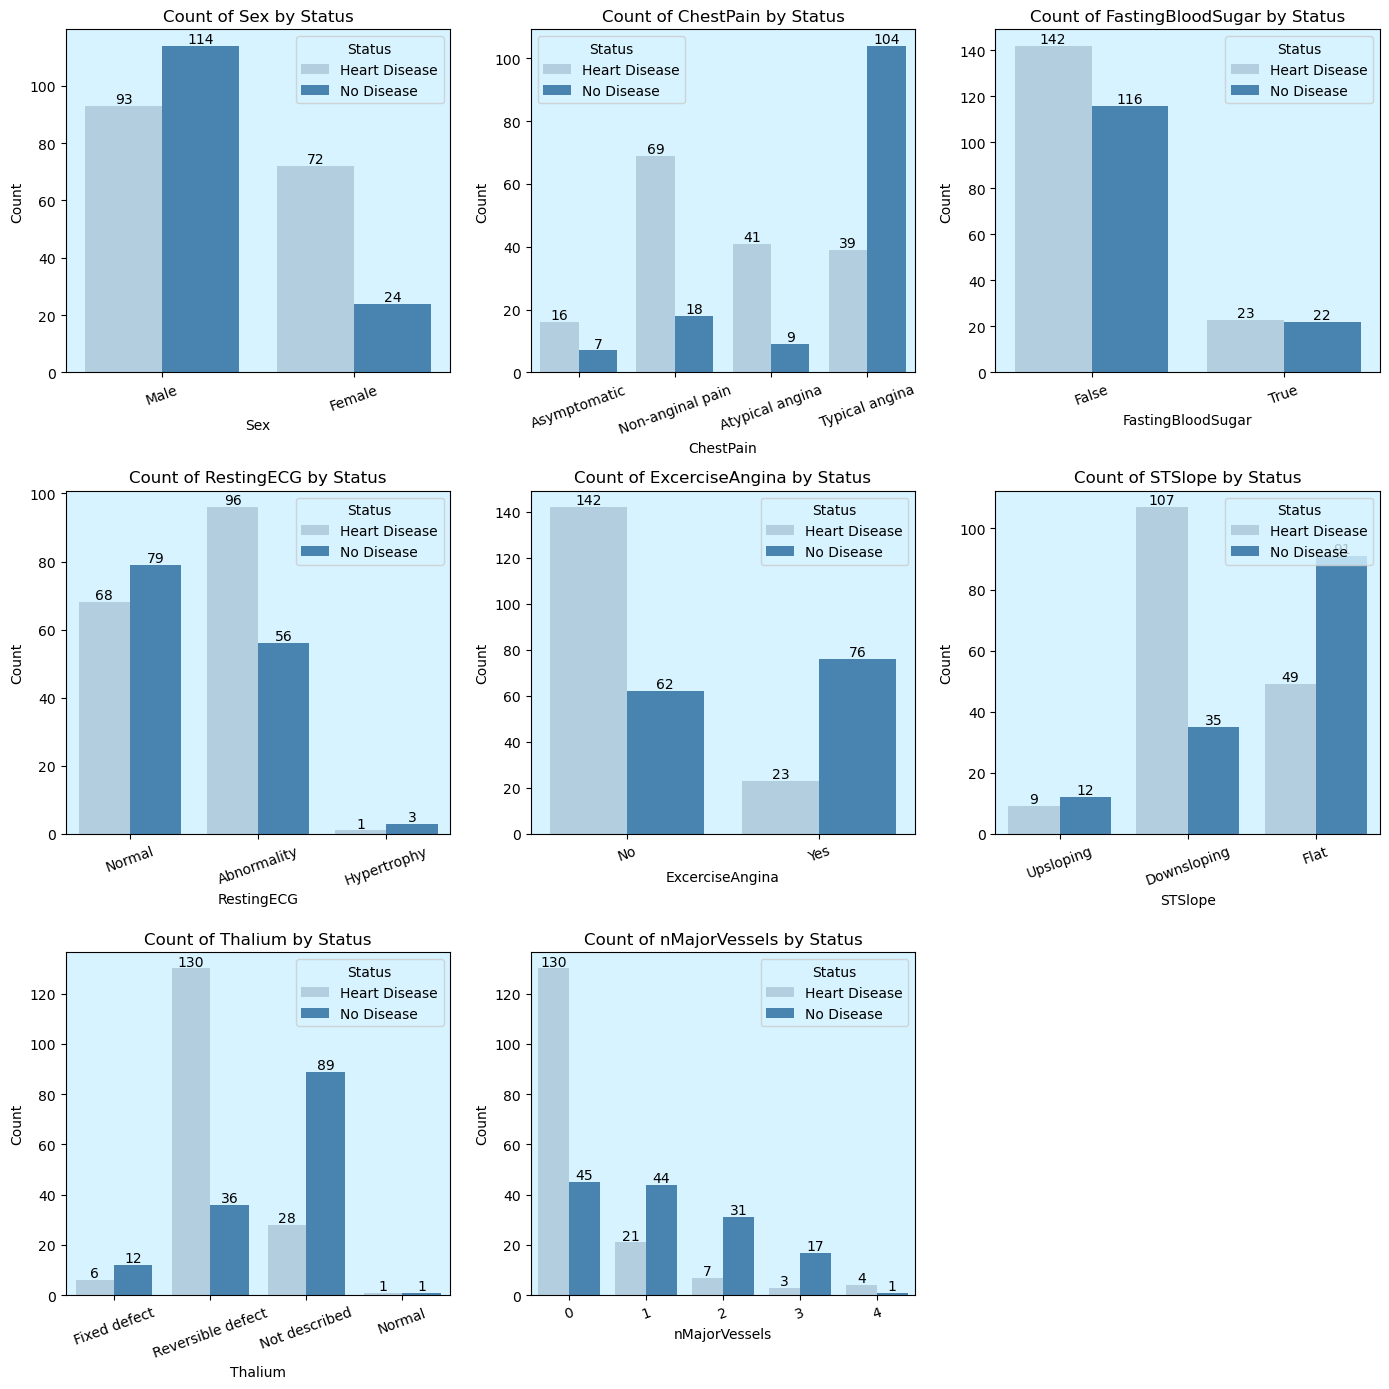

In [ ]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Step 5 | Preprocessing

### Step 5.1 | Handling Outliers

In [ ]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df


,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


In [ ]:
def box_cox_transform(heart_df):
    transformed_df = heart_df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(heart_df[feature] <= 0):
            min_value = abs(heart_df[feature].min()) + 1
            heart_df[feature] += min_value
        transformed_feature, lambda_value = boxcox(heart_df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [ ]:
def plot_transform(heart_df, transformed_df, variable):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=heart_df[variable], ax=axes[0, 0], color='#00308F')
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8')
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(heart_df[variable], ax=axes[1, 0], kde=True, color='#00308F')
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8')
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [ ]:
transformed_df = box_cox_transform(heart_df)

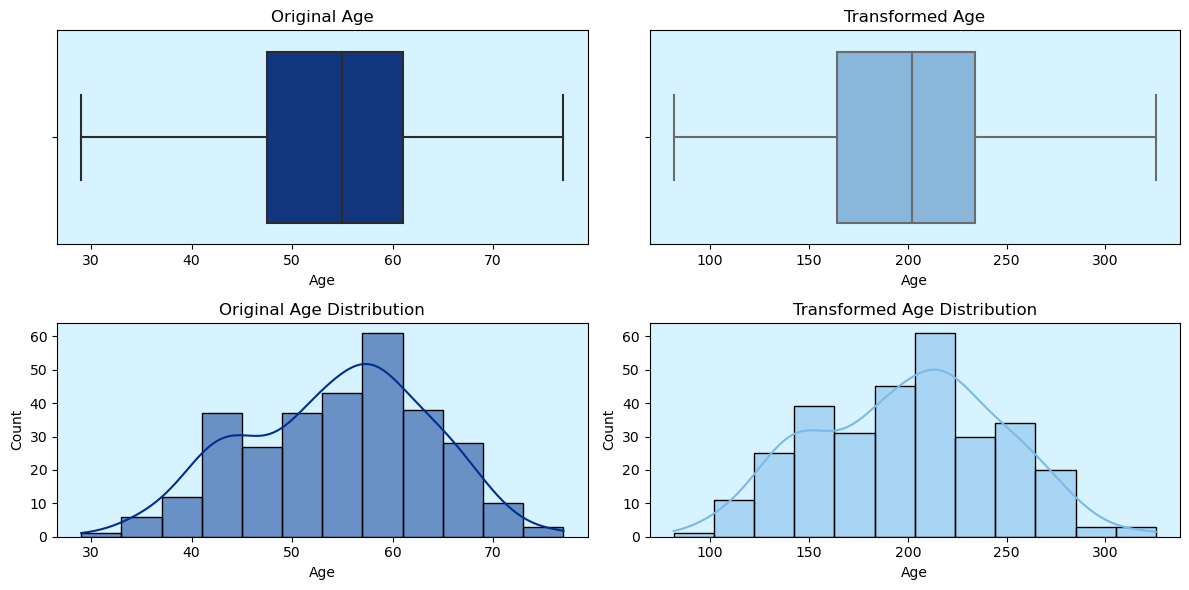

In [ ]:
# Age variable
plot_transform(heart_df, transformed_df, 'Age')

In [ ]:
skewness_dist(heart_df_eda, "Age")

Skewness of the Age variable: -0.202

The distribution is left-skewed.


In [ ]:
skewness_dist(transformed_df, "Age")

Skewness of the Age variable: -0.053

The distribution is left-skewed.


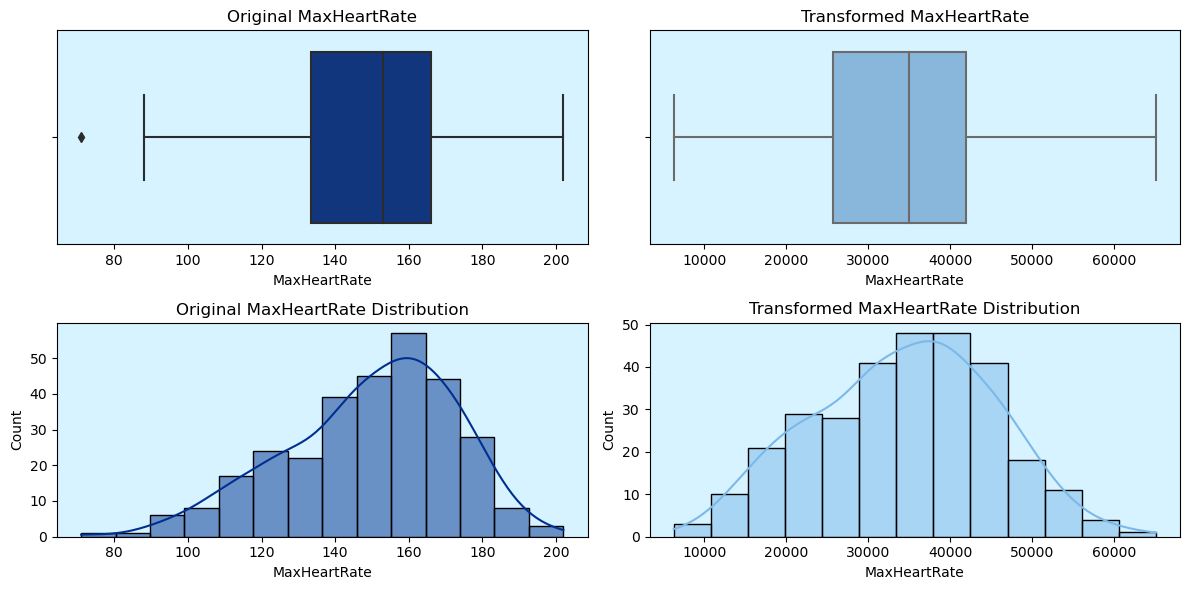

In [ ]:
#Max Heart Rate variable
plot_transform(heart_df, transformed_df, 'MaxHeartRate')

In [ ]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537

The distribution is left-skewed.


In [ ]:
skewness_dist(transformed_df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.075

The distribution is left-skewed.


In [ ]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]

('MaxHeartRate', 1)

In [ ]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 1449.5813416479687

Upper Bound: 66261.20163216196

Outliers': 0


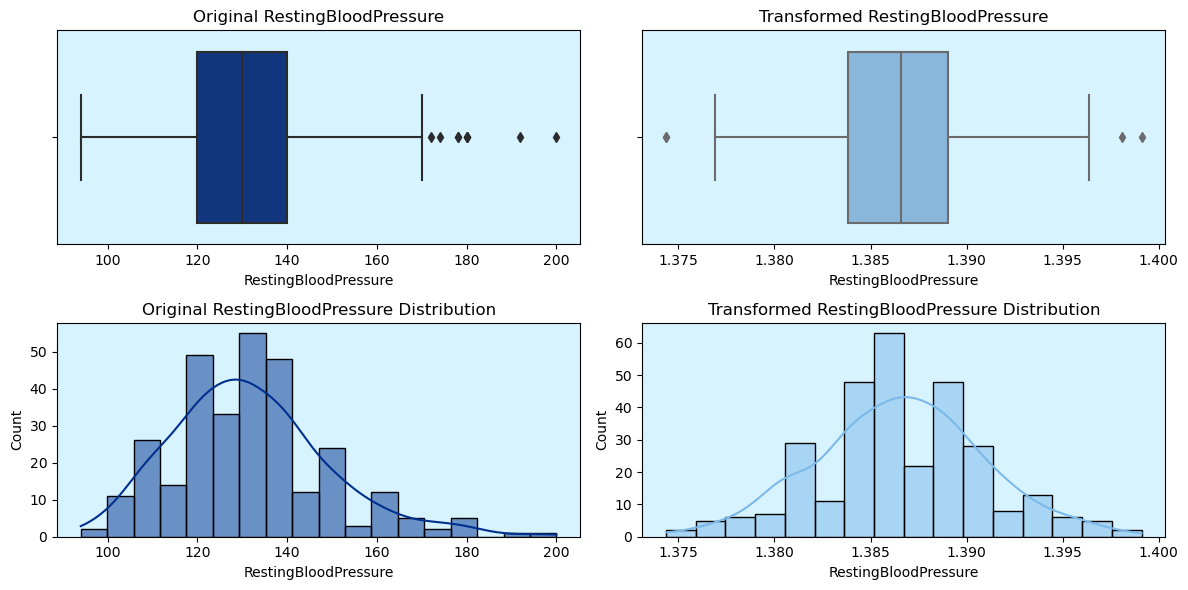

In [ ]:
 #Resting Blood Pressure variable
plot_transform(heart_df, transformed_df, 'RestingBloodPressure')

In [ ]:
skewness_dist(heart_df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714

The distribution is right-skewed.


In [ ]:
skewness_dist(transformed_df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: -0.001

The distribution is left-skewed.


In [ ]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]

('RestingBloodPressure', 9)

In [ ]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.3760249306944374

Upper Bound: 1.3968131245105593

Outliers: 4


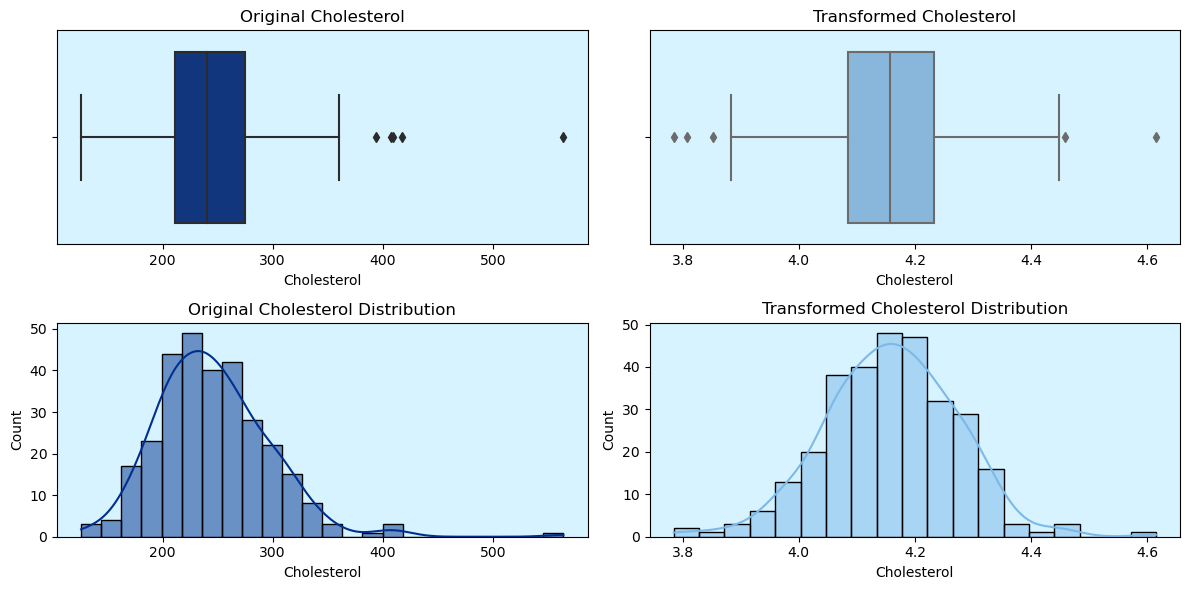

In [ ]:
#Cholesterol variable
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [ ]:
transformed_df = box_cox_transform(heart_df)

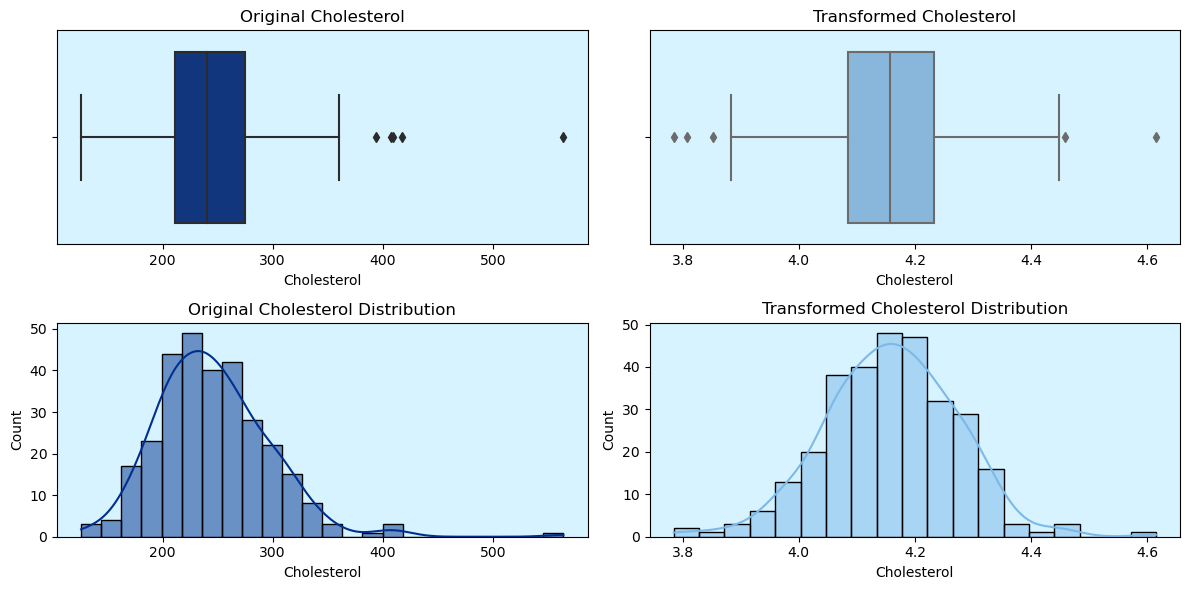

In [ ]:
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [ ]:
skewness_dist(heart_df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143

The distribution is right-skewed.


In [ ]:
skewness_dist(transformed_df, "Cholesterol")

Skewness of the Cholesterol variable: -0.006

The distribution is left-skewed.


In [ ]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.864332295042104

Upper Bound: 4.453078106789231

Outliers: 5


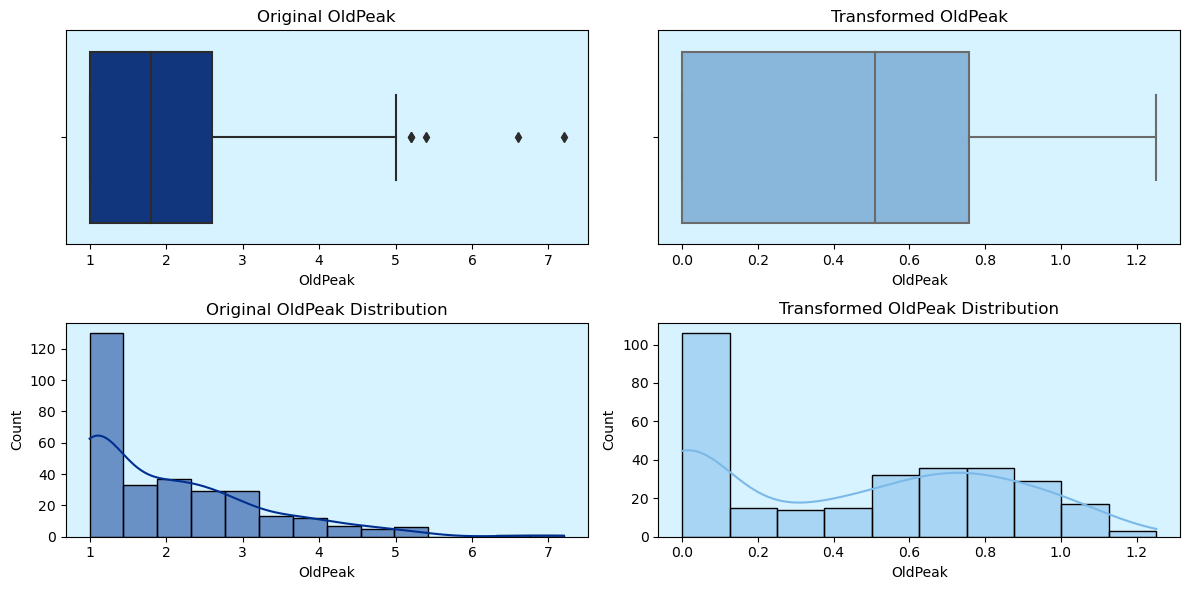

In [ ]:
# Old Peak variable
plot_transform(heart_df, transformed_df, 'OldPeak')

In [ ]:
skewness_dist(heart_df_eda, "OldPeak")
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 1.270

The distribution is right-skewed.

Skewness of the OldPeak variable: 0.124

The distribution is right-skewed.


In [ ]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.1382439503934751

Upper Bound: 1.897073250655792

Outliers': 0


In [ ]:
transformed = transformed_df.copy()

In [ ]:
heart_df_copy = heart_df.copy()

###  Step 5.2 | Missing Values

In [ ]:
heart_df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

### Step 5.3 | Duplicated Values

In [ ]:
duplicated_rows = heart_df.duplicated()
heart_df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,1.0,Downsloping,4,Reversible defect,Heart Disease


In [ ]:
heart_df.drop(index=164, axis=0, inplace=True)

In [ ]:
transformed.drop(index=164, axis=0, inplace=True)

#  Step 6 | Feature Engineering



###  Step 6.1 | One-Hot Encoding

In [ ]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

In [ ]:
heart_df = pd.get_dummies(heart_df, columns=features_to_encode)

In [ ]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)

In [ ]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

In [ ]:
bool_columns2 = heart_df.select_dtypes(include=bool).columns
heart_df[bool_columns2] = heart_df[bool_columns2].astype("int64")

###  Step 6.2 | Label Encoding

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']

In [ ]:
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [ ]:
for feature in features_to_encode:
    heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

In [ ]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>

Index: 302 entries, 0 to 302

Data columns (total 24 columns):

 #   Column                      Non-Null Count  Dtype  

---  ------                      --------------  -----  

 0   Age                         302 non-null    float64

 1   Sex                         302 non-null    int64  

 2   RestingBloodPressure        302 non-null    float64

 3   Cholesterol                 302 non-null    float64

 4   FastingBloodSugar           302 non-null    int64  

 5   MaxHeartRate                302 non-null    float64

 6   ExcerciseAngina             302 non-null    int64  

 7   OldPeak                     302 non-null    float64

 8   nMajorVessels               302 non-null    int64  

 9   Status                      302 non-null    int64  

 10  ChestPain_Asymptomatic      302 non-null    int64  

 11  ChestPain_Atypical angina   302 non-null    int64  

 12  ChestPain_Non-anginal pain  302 non-null    int64  

 13  ChestPain_Typical angi

# Step 7 | Correlation Analysis



In [ ]:
df_corr = heart_df.copy()

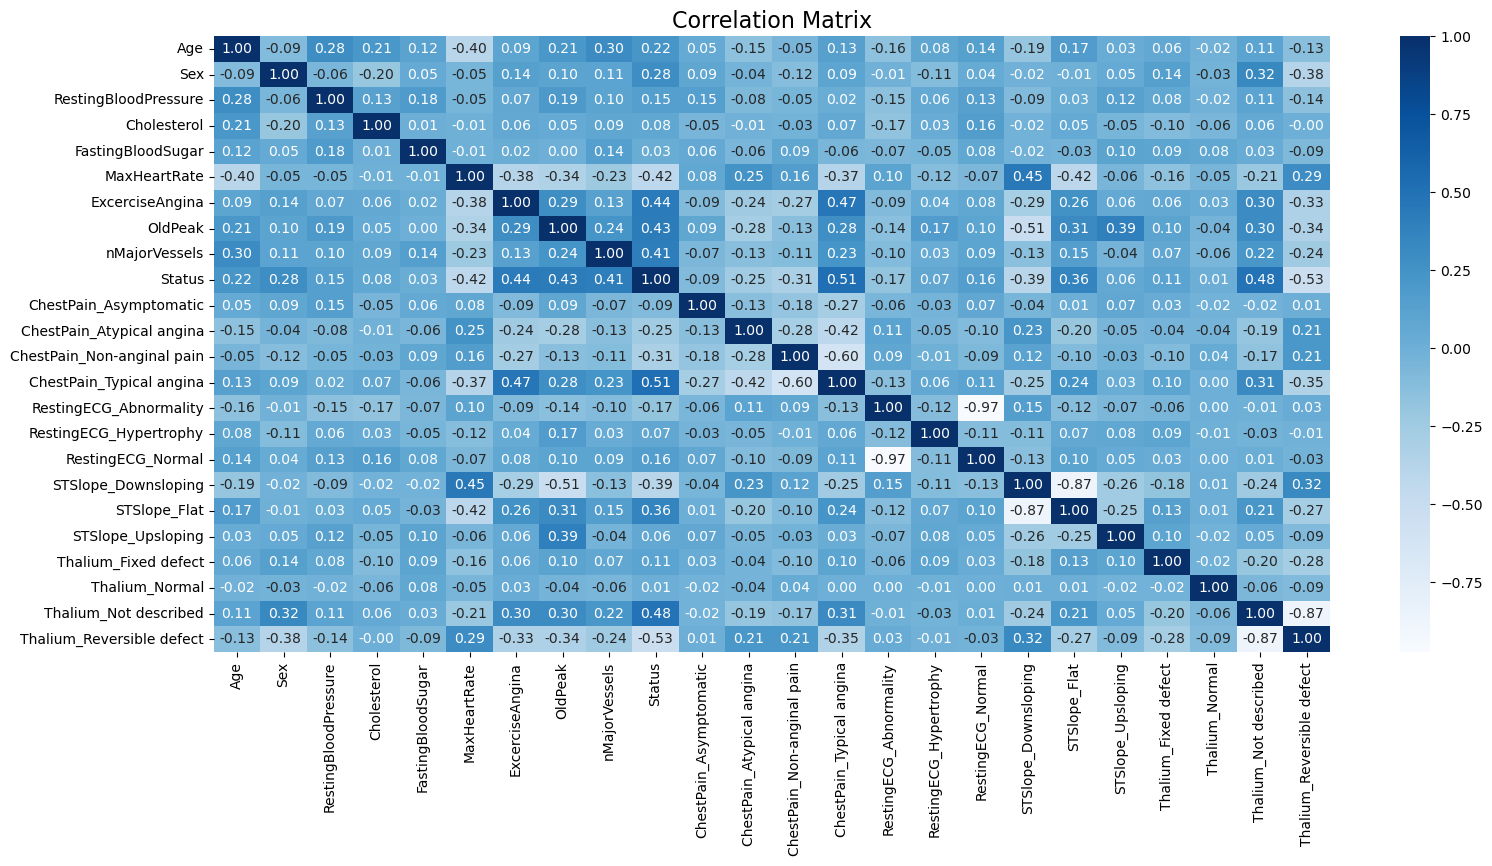

In [ ]:
df_correlation = df_corr.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
heart_df2.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [ ]:
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [ ]:
df3_no_transformed = heart_df2.copy()

In [ ]:
heart_df3 = transformed.copy()

In [ ]:
heart_df3

,Age,Sex,RestingBloodPressure,Cholesterol,FastingBloodSugar,MaxHeartRate,ExcerciseAngina,OldPeak,nMajorVessels,Status,ChestPain_Atypical angina,ChestPain_Non-anginal pain,ChestPain_Typical angina,RestingECG_Abnormality,RestingECG_Normal,STSlope_Downsloping,STSlope_Flat,Thalium_Fixed defect,Thalium_Not described,Thalium_Reversible defect
0,245.026003,1,1.390125,4.141081,1,33435.178719,0,0.897845,0,0,0,0,0,0,1,0,0,1,0,0
1,115.210734,1,1.386589,4.180465,0,54788.235951,0,1.055476,0,0,0,1,0,1,0,0,0,0,0,1
2,133.288287,0,1.386589,4.065939,0,45430.223348,0,0.708296,0,0,1,0,0,0,1,1,0,0,0,1
3,207.381618,1,1.383821,4.148257,0,49057.156271,0,0.508937,0,0,1,0,0,1,0,1,0,0,0,1
4,212.646759,0,1.383821,4.370746,0,40277.331099,1,0.418628,0,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,212.646759,0,1.389018,4.159997,0,21435.956407,1,0.174220,0,1,0,0,1,1,0,0,1,0,1,0
299,152.107773,1,1.380631,4.210738,0,25109.759124,0,0.651009,0,1,0,0,0,1,0,0,1,0,1,0
300,273.002120,1,1.389908,4.034289,1,29107.774522,0,1.044861,2,1,0,0,1,1,0,0,1,0,1,0
301,212.646759,1,1.386589,3.807768,0,18438.131804,1,0.651009,1,1,0,0,1,1,0,0,1,0,1,0


# Step 8 | Feature Scaling


In [ ]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])

transformed_scaled = scaler.transform(transformed[features_to_scale])
transformed[features_to_scale] = transformed_scaled

In [ ]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])

In [ ]:
heart_df2[features_to_scale] = scaler.fit_transform(heart_df[features_to_scale])

 # Step 9 | Modeling



In [ ]:
def customize_split(heart_df):
    df_shuffled = heart_df.sample(frac=1, random_state=42)

    train_size = 0.7
    test_size = 0.3

    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

    train_df = df_shuffled.head(num_samples_train)

    num_samples_per_class_test = int(num_samples_test / 2)
    test_df = pd.concat([df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
                         df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)])

    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values

    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    print(test_df['Status'].value_counts())

    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100

    return X_train, X_test, y_train, y_test, percent_train, percent_test

In [ ]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(heart_df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status

0    45

1    45

Name: count, dtype: int64

Status

0    45

1    45

Name: count, dtype: int64


In [ ]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 69.87%

Percentage of samples for testing: 29.80%


In [ ]:
(pd.DataFrame(df2_y_train)).value_counts()

0    114
1     97
Name: count, dtype: int64

In [ ]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

Status

0    45

1    45

Name: count, dtype: int64


### Logistic Regression

Logistic Regression Confusion Matrix:

[[42  7]

 [ 6 36]]

Logistic Regression Accuracy: 0.8571428571428571

Logistic Regression Precision: 0.8372093023255814

Logistic Regression Recall: 0.8571428571428571

Logistic Regression F1-score: 0.8470588235294119


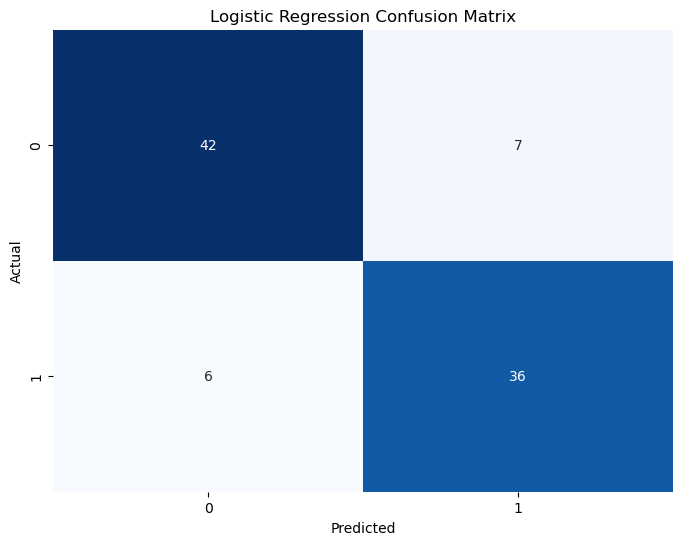

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier (Logistic Regression)
clf_lr = LogisticRegression(random_state=42)

# Train the classifier
clf_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

# Generate confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate accuracy metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

# Plot confusion matrix heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### DecisionTree

Decision Tree Confusion Matrix:

[[37 12]

 [12 30]]

Decision Tree Accuracy: 0.7362637362637363

Decision Tree Precision: 0.7142857142857143

Decision Tree Recall: 0.7142857142857143

Decision Tree F1-score: 0.7142857142857143


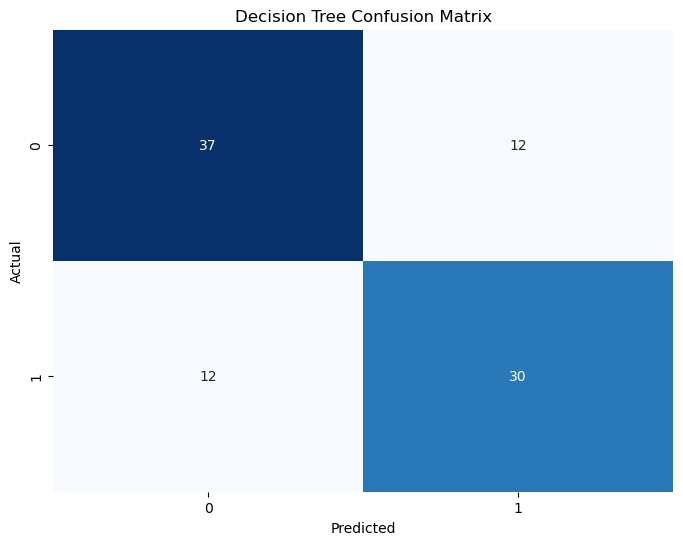

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf_decisiontree = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree classifier
clf_decisiontree.fit(X_train, y_train)
# Make predictions on the test set using Decision Tree
y_pred_decisiontree = clf_decisiontree.predict(X_test)
# Generate confusion matrix for Decision Tree
cm_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
# Calculate accuracy metrics for Decision Tree
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
precision_decisiontree = precision_score(y_test, y_pred_decisiontree)
recall_decisiontree = recall_score(y_test, y_pred_decisiontree)
f1_decisiontree = f1_score(y_test, y_pred_decisiontree)
print("Decision Tree Confusion Matrix:")
print(cm_decisiontree)
print("Decision Tree Accuracy:", accuracy_decisiontree)
print("Decision Tree Precision:", precision_decisiontree)
print("Decision Tree Recall:", recall_decisiontree)
print("Decision Tree F1-score:", f1_decisiontree)
# Plot confusion matrix heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decisiontree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### RandomForest

Random Forest Confusion Matrix:

[[43  6]

 [ 6 36]]

Random Forest Accuracy: 0.8681318681318682

Random Forest Precision: 0.8571428571428571

Random Forest Recall: 0.8571428571428571

Random Forest F1-score: 0.8571428571428571


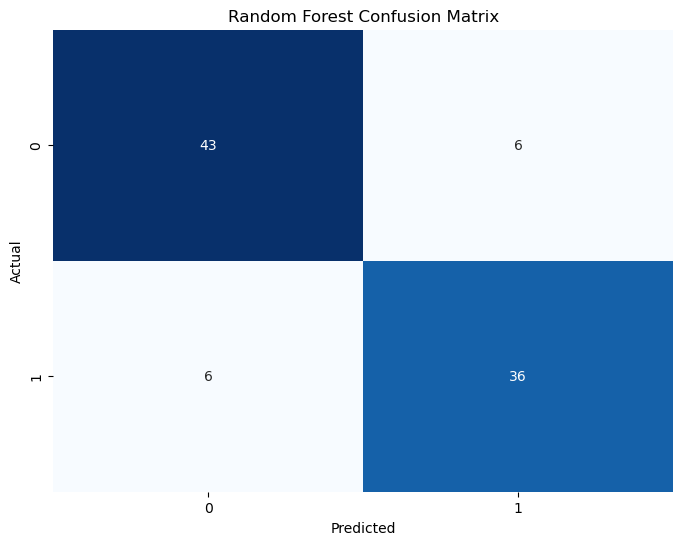

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier (Random Forest Classifier)
clf_rf = RandomForestClassifier(random_state=42)

# Train the classifier
clf_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test)

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate accuracy metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(cm_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# Plot confusion matrix heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### SVM  with RBF kernel

SVM with RBF Kernel Confusion Matrix:

[[42  7]

 [21 21]]

SVM with RBF Kernel Accuracy: 0.6923076923076923

SVM with RBF Kernel Precision: 0.75

SVM with RBF Kernel Recall: 0.5

SVM with RBF Kernel F1-score: 0.6


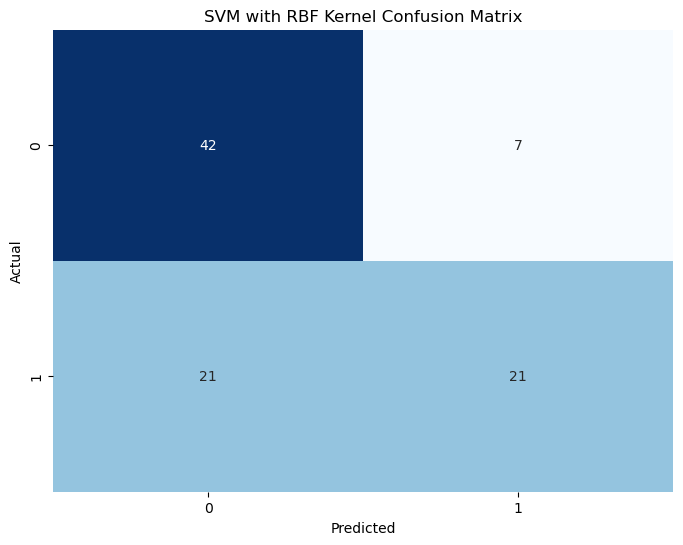

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
clf_svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier
clf_svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_rbf = clf_svm_rbf.predict(X_test)

# Generate confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Calculate accuracy metrics for SVM with RBF kernel
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)

print("SVM with RBF Kernel Confusion Matrix:")
print(cm_svm_rbf)
print("SVM with RBF Kernel Accuracy:", accuracy_svm_rbf)
print("SVM with RBF Kernel Precision:", precision_svm_rbf)
print("SVM with RBF Kernel Recall:", recall_svm_rbf)
print("SVM with RBF Kernel F1-score:", f1_svm_rbf)

# Plot confusion matrix heatmap for SVM with RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### SVM classifier with Sigmoid kernel

SVM with Sigmoid Kernel Confusion Matrix:

[[49  0]

 [42  0]]

SVM with Sigmoid Kernel Accuracy: 0.5384615384615384

SVM with Sigmoid Kernel Precision: 0.0

SVM with Sigmoid Kernel Recall: 0.0

SVM with Sigmoid Kernel F1-score: 0.0


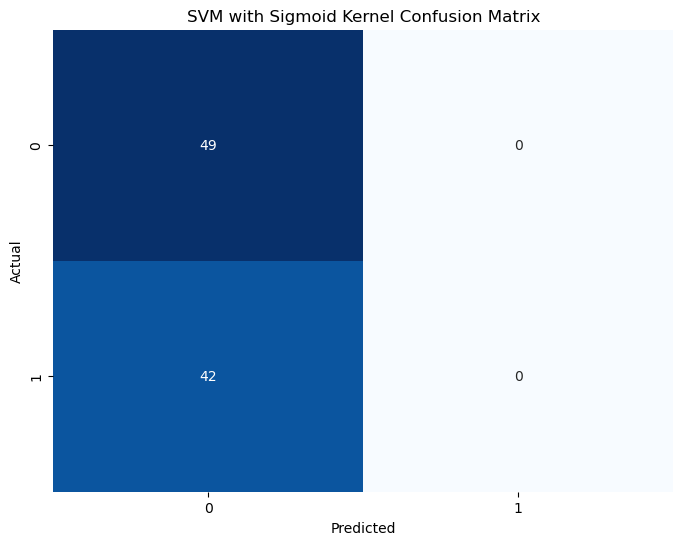

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier with Sigmoid kernel
clf_svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Train the classifier
clf_svm_sigmoid.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm_sigmoid = clf_svm_sigmoid.predict(X_test)

# Generate confusion matrix for SVM with Sigmoid kernel
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_svm_sigmoid)

# Calculate accuracy metrics for SVM with Sigmoid kernel
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid)
precision_svm_sigmoid = precision_score(y_test, y_pred_svm_sigmoid)
recall_svm_sigmoid = recall_score(y_test, y_pred_svm_sigmoid)
f1_svm_sigmoid = f1_score(y_test, y_pred_svm_sigmoid)

print("SVM with Sigmoid Kernel Confusion Matrix:")
print(cm_svm_sigmoid)
print("SVM with Sigmoid Kernel Accuracy:", accuracy_svm_sigmoid)
print("SVM with Sigmoid Kernel Precision:", precision_svm_sigmoid)
print("SVM with Sigmoid Kernel Recall:", recall_svm_sigmoid)
print("SVM with Sigmoid Kernel F1-score:", f1_svm_sigmoid)

# Plot confusion matrix heatmap for SVM with Sigmoid kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_sigmoid, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with Sigmoid Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### XGboost

XGBoost Confusion Matrix:

[[39 10]

 [ 7 35]]

XGBoost Accuracy: 0.8131868131868132

XGBoost Precision: 0.7777777777777778

XGBoost Recall: 0.8333333333333334

XGBoost F1-score: 0.8045977011494253


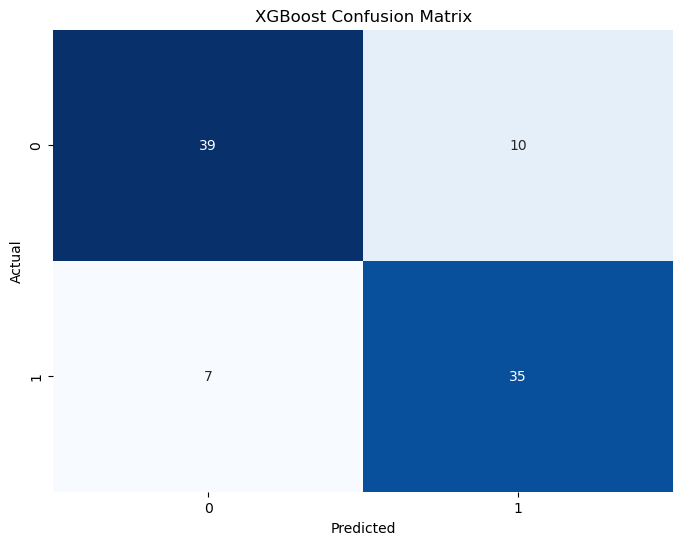

In [ ]:
import xgboost as xgb

# Initialize the classifier (XGBoost)
clf_xgb = xgb.XGBClassifier(random_state=42)

# Train the classifier
clf_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate accuracy metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Confusion Matrix:")
print(cm_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-score:", f1_xgb)

# Plot confusion matrix heatmap for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### CatBoost

CatBoost Confusion Matrix:

[[40  9]

 [ 7 35]]

CatBoost Accuracy: 0.8241758241758241

CatBoost Precision: 0.7954545454545454

CatBoost Recall: 0.8333333333333334

CatBoost F1-score: 0.8139534883720929


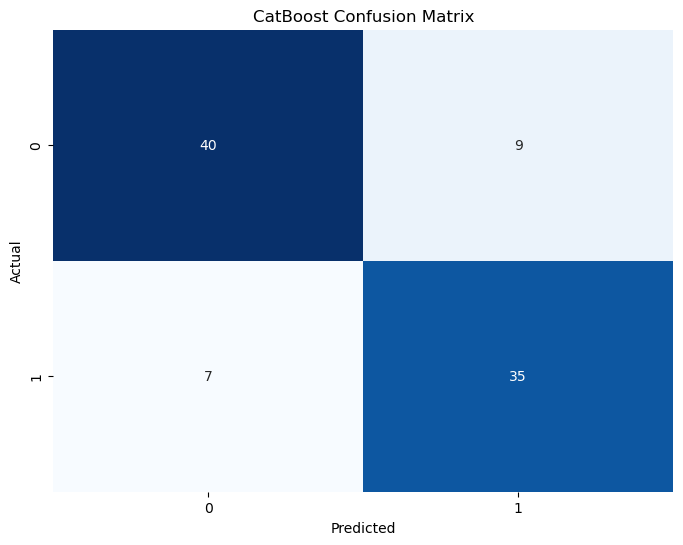

In [ ]:
from catboost import CatBoostClassifier

# Initialize the classifier (CatBoost) with verbose=False
clf_catboost = CatBoostClassifier(verbose=False, random_state=42)

# Train the classifier
clf_catboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = clf_catboost.predict(X_test)

# Generate confusion matrix for CatBoost
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Calculate accuracy metrics for CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)

print("CatBoost Confusion Matrix:")
print(cm_catboost)
print("CatBoost Accuracy:", accuracy_catboost)
print("CatBoost Precision:", precision_catboost)
print("CatBoost Recall:", recall_catboost)
print("CatBoost F1-score:", f1_catboost)

# Plot confusion matrix heatmap for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### GaussianNB

Gaussian Naive Bayes Confusion Matrix:

[[38 11]

 [ 6 36]]

Gaussian Naive Bayes Accuracy: 0.8131868131868132

Gaussian Naive Bayes Precision: 0.7659574468085106

Gaussian Naive Bayes Recall: 0.8571428571428571

Gaussian Naive Bayes F1-score: 0.8089887640449439


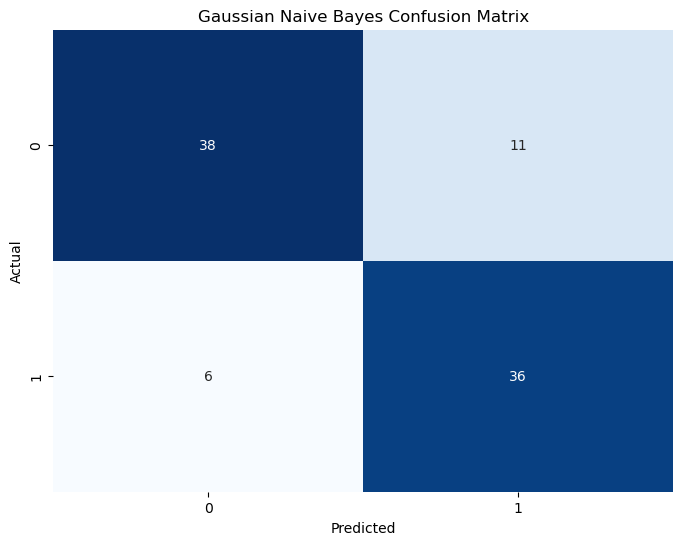

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier (Gaussian Naive Bayes)
clf_nb = GaussianNB()

# Train the classifier
clf_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test)

# Generate confusion matrix for Gaussian Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate accuracy metrics for Gaussian Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Gaussian Naive Bayes Confusion Matrix:")
print(cm_nb)
print("Gaussian Naive Bayes Accuracy:", accuracy_nb)
print("Gaussian Naive Bayes Precision:", precision_nb)
print("Gaussian Naive Bayes Recall:", recall_nb)
print("Gaussian Naive Bayes F1-score:", f1_nb)

# Plot confusion matrix heatmap for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### AdaBoostClassifier

AdaBoost Confusion Matrix:

[[37 12]

 [ 7 35]]

AdaBoost Accuracy: 0.7912087912087912

AdaBoost Precision: 0.7446808510638298

AdaBoost Recall: 0.8333333333333334

AdaBoost F1-score: 0.7865168539325842


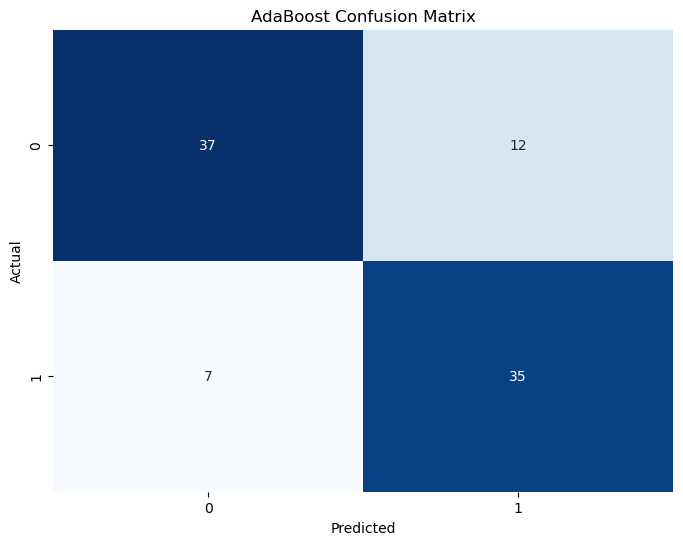

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the classifier (AdaBoost)
clf_adaboost = AdaBoostClassifier(random_state=42)

# Train the classifier
clf_adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = clf_adaboost.predict(X_test)

# Generate confusion matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Calculate accuracy metrics for AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

print("AdaBoost Confusion Matrix:")
print(cm_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)
print("AdaBoost Precision:", precision_adaboost)
print("AdaBoost Recall:", recall_adaboost)
print("AdaBoost F1-score:", f1_adaboost)

# Plot confusion matrix heatmap for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### GradientBoostingClassifier

Gradient Boosting Confusion Matrix:

[[39 10]

 [ 6 36]]

Gradient Boosting Accuracy: 0.8241758241758241

Gradient Boosting Precision: 0.782608695652174

Gradient Boosting Recall: 0.8571428571428571

Gradient Boosting F1-score: 0.8181818181818182


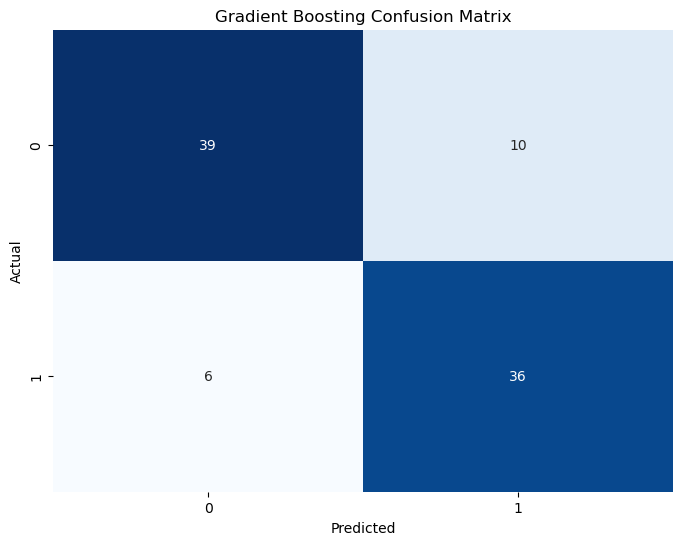

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier (Gradient Boosting)
clf_gradientboost = GradientBoostingClassifier(random_state=42)

# Train the classifier
clf_gradientboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gradientboost = clf_gradientboost.predict(X_test)

# Generate confusion matrix for Gradient Boosting
cm_gradientboost = confusion_matrix(y_test, y_pred_gradientboost)

# Calculate accuracy metrics for Gradient Boosting
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(y_test, y_pred_gradientboost)
recall_gradientboost = recall_score(y_test, y_pred_gradientboost)
f1_gradientboost = f1_score(y_test, y_pred_gradientboost)

print("Gradient Boosting Confusion Matrix:")
print(cm_gradientboost)
print("Gradient Boosting Accuracy:", accuracy_gradientboost)
print("Gradient Boosting Precision:", precision_gradientboost)
print("Gradient Boosting Recall:", recall_gradientboost)
print("Gradient Boosting F1-score:", f1_gradientboost)

# Plot confusion matrix heatmap for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gradientboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### RidgeClassifier

Ridge Classifier Confusion Matrix:

[[41  8]

 [ 7 35]]

Ridge Classifier Accuracy: 0.8351648351648352

Ridge Classifier Precision: 0.813953488372093

Ridge Classifier Recall: 0.8333333333333334

Ridge Classifier F1-score: 0.8235294117647058


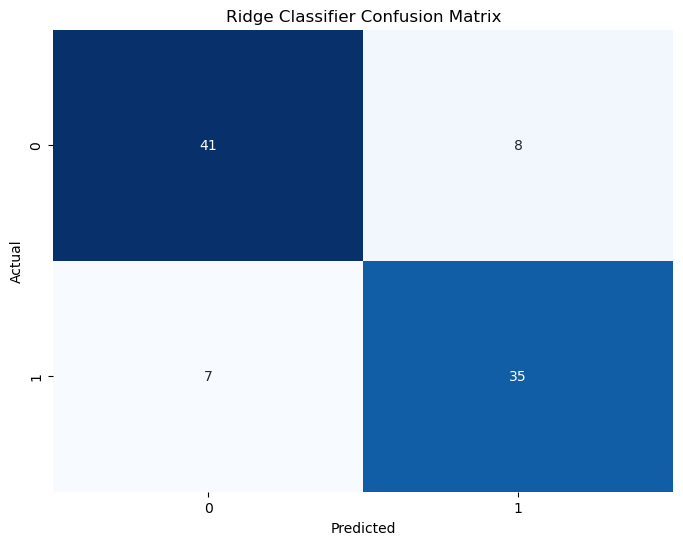

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Initialize the Ridge Classifier
clf_ridge = RidgeClassifier()

# Train the classifier
clf_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = clf_ridge.predict(X_test)

# Generate confusion matrix for Ridge Classifier
cm_ridge = confusion_matrix(y_test, y_pred_ridge)

# Calculate accuracy metrics for Ridge Classifier
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
precision_ridge = precision_score(y_test, y_pred_ridge)
recall_ridge = recall_score(y_test, y_pred_ridge)
f1_ridge = f1_score(y_test, y_pred_ridge)

print("Ridge Classifier Confusion Matrix:")
print(cm_ridge)
print("Ridge Classifier Accuracy:", accuracy_ridge)
print("Ridge Classifier Precision:", precision_ridge)
print("Ridge Classifier Recall:", recall_ridge)
print("Ridge Classifier F1-score:", f1_ridge)

# Plot confusion matrix heatmap for Ridge Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ridge, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Ridge Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Multi-Layer Perceptron Classifier

Multi-Layer Perceptron Confusion Matrix:

[[46  3]

 [16 26]]

Multi-Layer Perceptron Accuracy: 0.7912087912087912

Multi-Layer Perceptron Precision: 0.896551724137931

Multi-Layer Perceptron Recall: 0.6190476190476191

Multi-Layer Perceptron F1-score: 0.732394366197183


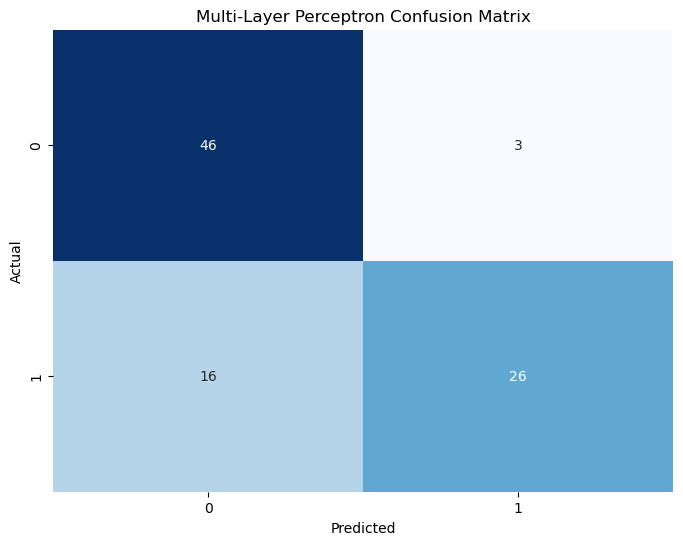

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the classifier (Multi-Layer Perceptron)
clf_mlp = MLPClassifier(random_state=42)

# Train the classifier
clf_mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = clf_mlp.predict(X_test)

# Generate confusion matrix for Multi-Layer Perceptron
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Calculate accuracy metrics for Multi-Layer Perceptron
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("Multi-Layer Perceptron Confusion Matrix:")
print(cm_mlp)
print("Multi-Layer Perceptron Accuracy:", accuracy_mlp)
print("Multi-Layer Perceptron Precision:", precision_mlp)
print("Multi-Layer Perceptron Recall:", recall_mlp)
print("Multi-Layer Perceptron F1-score:", f1_mlp)

# Plot confusion matrix heatmap for Multi-Layer Perceptron
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Multi-Layer Perceptron Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Step 10 | Model Comparison

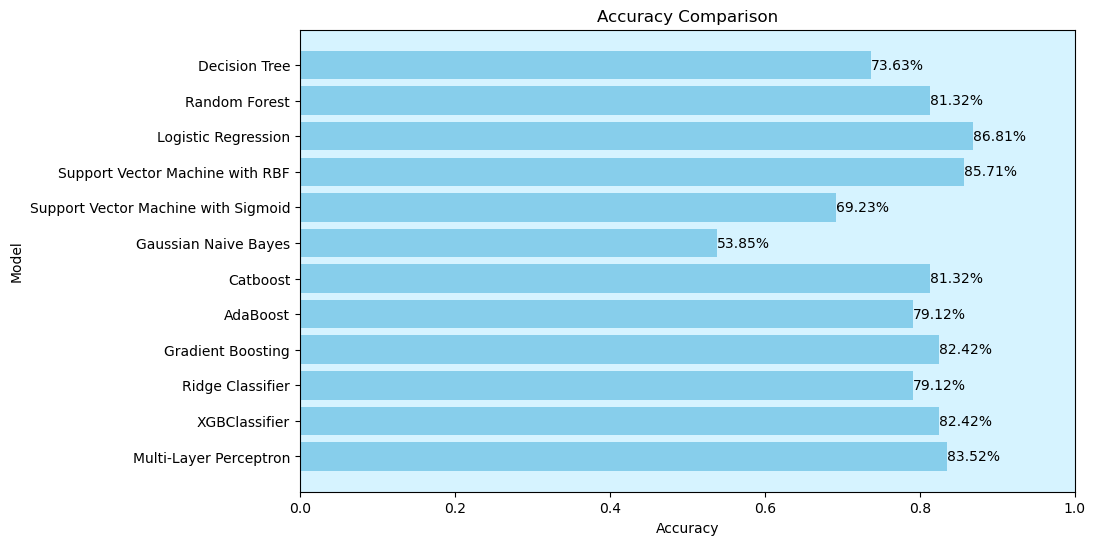

In [ ]:
# List of classifiers and their corresponding accuracy scores
classifiers = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine with RBF','Support Vector Machine with Sigmoid', 'Gaussian Naive Bayes','Catboost','AdaBoost', 'Gradient Boosting','Ridge Classifier','XGBClassifier','Multi-Layer Perceptron']
accuracies = [accuracy_decisiontree,accuracy_xgb, accuracy_rf, accuracy_lr, accuracy_svm_rbf, accuracy_svm_sigmoid ,accuracy_nb, accuracy_mlp,accuracy_catboost , accuracy_adaboost, accuracy_gradientboost,accuracy_ridge]

# Plotting the accuracy scores with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Percentage labels on each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy*100:.2f}%',
             va='center', ha='left', fontsize=10, color='black')

plt.show()

